## Baseline Model Pipeline : Titanic Machine Learning from Disaster 

This is the baseline kernel (automatically generated by Bot: AIsha). In this kernel, an end to end classification pipeline is implemented.

### Contents 

1. Prepare Environment  
2. Dataset Preparation  
3. Data Preprocessing   
4. Modelling   
&nbsp;&nbsp;&nbsp;&nbsp; 4.1 Logistic Regression  
&nbsp;&nbsp;&nbsp;&nbsp; 4.2 Random Forest  
&nbsp;&nbsp;&nbsp;&nbsp; 4.3 Extereme Gradient Boosting  
5. Feature Importance   
6. Creating Submission  

## Step 1: Prepare Environment
Lets load the required libraries to be used

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from xgboost import plot_importance
import matplotlib.pyplot as plt
import xgboost as xgb 
import pandas as pd

## Step 2: Dataset Preparation
Load the train and test dataset into memory

In [2]:
## read dataset
train_df = pd.read_csv('../input/train.csv')
test_df = pd.read_csv("../input/test.csv")

Get Predictors and Target variables 

In [3]:
## get predictor and target variables
_target = "Survived"
_id = "PassengerId" 
Y = train_df[_target]
test_id = test_df[_id]

## drop the target and id columns
train_df = train_df.drop([_target, _id], axis=1)
test_df = test_df.drop([_id], axis=1)

Lets look at the dataset snapshot and summary

In [4]:
## snapshot of train and test
train_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Lets plot the summary of the dataset

In [29]:
## snapshot of train and test
train_df.describe()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,655.143659,0.647587,29.699118,0.523008,0.381594,462.114478,32.204208,165.795735,1.538721
std,0.836071,374.128629,0.477990,13.002015,1.102743,0.806057,277.025043,49.693429,44.952320,0.794231
min,1.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,341.500000,0.000000,22.000000,0.000000,0.000000,211.500000,7.910400,186.000000,1.000000
50%,3.000000,661.000000,1.000000,29.699118,0.000000,0.000000,464.000000,14.454200,186.000000,2.000000
75%,3.000000,974.500000,1.000000,35.000000,1.000000,0.000000,715.000000,31.000000,186.000000,2.000000
max,3.000000,1306.000000,1.000000,80.000000,8.000000,6.000000,928.000000,512.329200,186.000000,3.000000


## Step 3: Data Preprocessing

In the data preprocessing step, we will perform label encoding of categorical variables and handle missing values.

### 3.1 Label Encoding
In this step, convert the categorical variables into label encoded forms 

In [6]:
## label encoding of categorical variables 
columns = train_df.columns
num_cols = train_df._get_numeric_data().columns
cat_cols = list(set(columns) - set(num_cols))
    
for col in cat_cols: 
    le = LabelEncoder()
    le.fit(list(train_df[col].values) + list(test_df[col].values))
    train_df[col] = le.transform(list(train_df[col].values))
    test_df[col] = le.transform(list(test_df[col].values))

### 3.2 Missing Values Treatment

Handle the missing values, for continuous variables, replace by mean. For categorical variables, replace by mode

In [30]:
## for numerical columns, replace the missing values by mean
train_df[num_cols] = train_df[num_cols].fillna(train_df[num_cols].mean())
test_df[num_cols] = test_df[num_cols].fillna(test_df[num_cols].mean())

## for categorical columns, replace the missing values by mode
train_df[cat_cols] = train_df[cat_cols].fillna(train_df[cat_cols].mode())
test_df[cat_cols] = test_df[cat_cols].fillna(test_df[cat_cols].mode())

## Step 4 : Create baseline model

Next step is the modelling step, lets start with the simple linear model 

### 4.1 : Logistic Regression

Train a binary classifier logistic regression


In [8]:
model = LogisticRegression()
model.fit(train_df, Y)
pred = model.predict(test_df)

### 4.2 : Random Forest Classifier

Now, lets train a tree based model : random forest

In [9]:
model = RandomForestClassifier()
model.fit(train_df, Y)
pred = model.predict(test_df)

### 4.3 : xgBoost Classifier

Lets train the extereme gradient boosting : xgboost classifier

In [14]:
model = xgb.XGBClassifier(n_estimators=300, learning_rate=0.01)
model.fit(train_df, Y)
pred = model.predict(test_df)

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## Step 5: Feature Importance

Lets look at some of the important features

<Figure size 1440x1152 with 0 Axes>

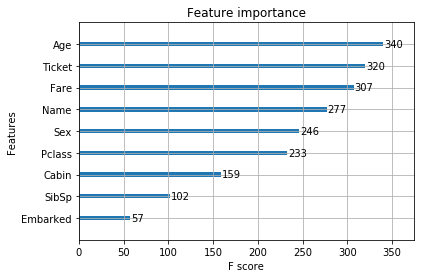

In [27]:
plt.figure(figsize=(20,16));
plot_importance(model, );

## Step 6 : Create Submission File

Finally, create the submission file from the extereme graident boosting model

In [17]:
sub = pd.DataFrame()
sub[_id] = test_id
sub[_target] = pred
sub.to_csv("baseline_submission.csv", index=False)
sub.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


Thanks for viewing, Hopefully this kernel can serve as the baseline model. 

One can use this kernel and extend it with following ideas : 

1. Feature Engineering  
2. Preprocessing and Cleaning  
3. Different Models  
4. Hyperparameter tuning  
5. Model Ensembling  
